# For this capstone project we will be analyzing some 911 call data from Kaggle. The data contains the following fields:

lat : String variable, Latitude
lng: String variable, Longitude
desc: String variable, Description of the Emergency Call
zip: String variable, Zipcode
title: String variable, Title
timeStamp: String variable, YYYY-MM-DD HH:MM:SS
twp: String variable, Township
addr: String variable, Address
e: String variable, Dummy variable (always 1)


In [1]:
import numpy as np
import pandas as pd

In [3]:
#Import visualization libraries and set %matplotlib inline.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
import os 
os.getcwd()


'C:\\Users\\VICTUS\\Desktop\\Edureka Notes\\Python Certification Training Course\\Project'

Read in the csv file as a dataframe called df

In [15]:
df = pd.read_csv('C:\\Users\\VICTUS\\Desktop\\Edureka Notes\\Python Certification Training Course\\Project\\911_calls.csv')
df.drop(labels = 'e',axis=1,inplace=True)

Check the info() of the df

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266543 entries, 0 to 266542
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        266543 non-null  float64
 1   lng        266543 non-null  float64
 2   desc       266543 non-null  object 
 3   zip        234049 non-null  float64
 4   title      266543 non-null  object 
 5   timeStamp  266543 non-null  object 
 6   twp        266448 non-null  object 
 7   addr       266543 non-null  object 
dtypes: float64(3), object(5)
memory usage: 16.3+ MB


In [18]:
#Check the head of df

In [19]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


Basic Questions

What are the top 5 zipcodes for 911 calls?

In [20]:
df['zip'].value_counts().iloc[:5]

19401.0    18401
19464.0    17937
19403.0    13366
19446.0    12828
19406.0     8820
Name: zip, dtype: int64

In [21]:
#What are the top 5 townships (twp) for 911 calls?



In [22]:
df['twp'].value_counts().iloc[:5]

LOWER MERION    22886
ABINGTON        16379
NORRISTOWN      15421
UPPER MERION    14015
CHELTENHAM      12272
Name: twp, dtype: int64

In [23]:
#Take a look at the 'title' column, how many unique title codes are there?

In [24]:
df['title'].nunique()

130

# Creating new features
In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.

For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.


In [25]:
df['Reason'] = df['title'].apply(lambda s:s.split(':')[0])
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [26]:
#What is the most common Reason for a 911 call based off of this new column?

In [27]:
df['Reason'].value_counts()

EMS        133234
Traffic     93400
Fire        39909
Name: Reason, dtype: int64

In [28]:
#Now use seaborn to create a countplot of 911 calls by Reason.

<AxesSubplot:xlabel='Reason', ylabel='count'>

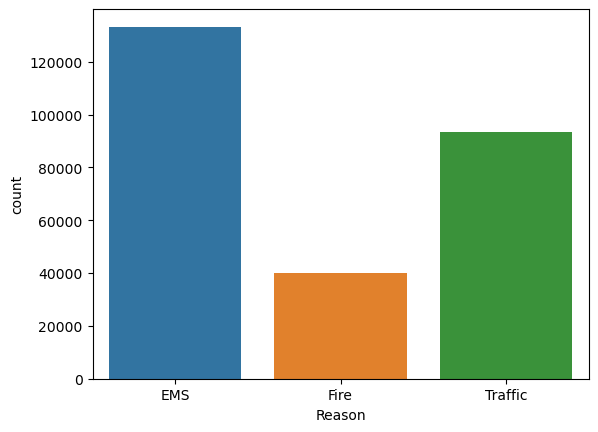

In [29]:
sns.countplot(x='Reason', data=df)

In [30]:
#Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?

In [31]:
type(df['timeStamp'].iloc[0])

str

You should have seen that these timestamps are still strings. Use pd.to_datetime to convert the column from strings to DateTime objects.

In [32]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [33]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [34]:
#You can now grab specific attributes from a Datetime object by calling them. For example:

In [35]:
time = df['timeStamp'].iloc[0]
time.hour

17

'''You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step

In [37]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [38]:
df.sample()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day of Week
256824,40.098804,-75.212824,BETHLEHEM PIKE; SPRINGFIELD; Station 311; 201...,NaN,EMS: ALTERED MENTAL STATUS,2017-10-10 09:20:34,SPRINGFIELD,BETHLEHEM PIKE,EMS,9,10,1


Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:

In [39]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [41]:
df['Day of Week'] = df['Day of Week'].apply(lambda int:dmap[int])

In [42]:
#Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

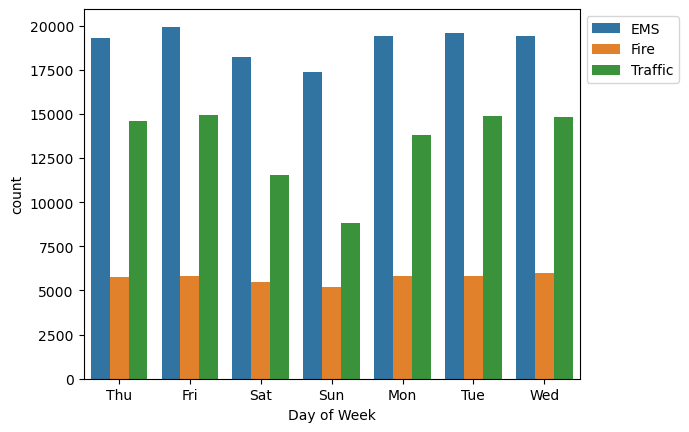

In [43]:
sns.countplot(x='Day of Week', hue='Reason', data=df)
plt.legend(bbox_to_anchor=(1,1))

In [44]:
#Now do the same for Month:

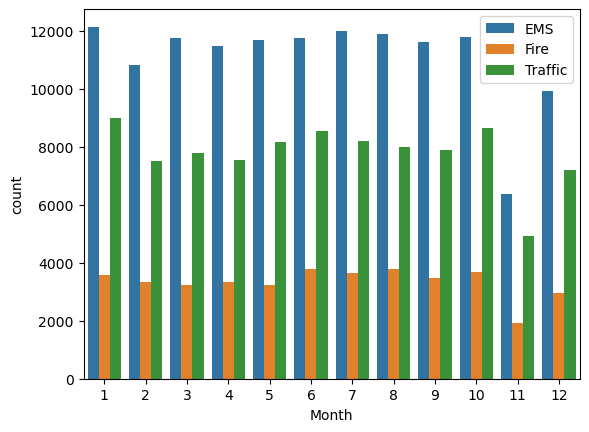

In [45]:
sns.countplot(x='Month', hue='Reason', data=df)
plt.legend(bbox_to_anchor=(1,1))

In [46]:
#Did you notice something strange about the Plot?

You should have noticed it was missing some months. Let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...

Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.

In [47]:
byMonth = df.groupby(by='Month').count()

In [48]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Day of Week
Month,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093
6,24065,24065,24065,21070,24065,24065,24058,24065,24065,24065,24065
7,23856,23856,23856,20940,23856,23856,23850,23856,23856,23856,23856
8,23657,23657,23657,20739,23657,23657,23646,23657,23657,23657,23657
9,23001,23001,23001,20014,23001,23001,22993,23001,23001,23001,23001


In [49]:
#Now create a simple plot off of the dataframe indicating the count of calls per month.

<AxesSubplot:xlabel='Month'>

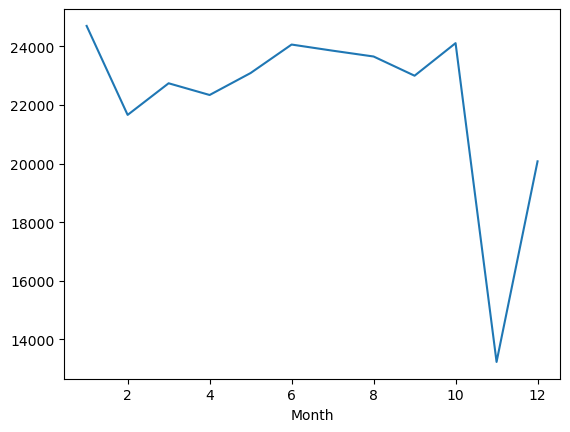

In [50]:
byMonth['lat'].plot()

<AxesSubplot:xlabel='Month', ylabel='lat'>

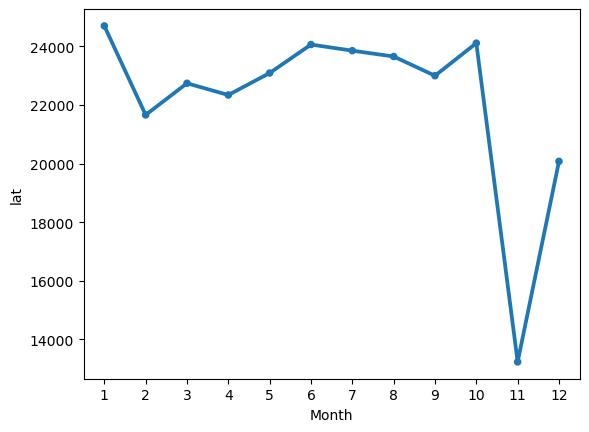

In [51]:
sns.pointplot(x=byMonth.index, y = 'lat', data=byMonth, markers='.')

Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column

In [52]:
byMonth['Month'] = byMonth.index
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Day of Week,Month
Month,,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,1
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,2
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,3
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,4
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,5
6,24065,24065,24065,21070,24065,24065,24058,24065,24065,24065,24065,6
7,23856,23856,23856,20940,23856,23856,23850,23856,23856,23856,23856,7
8,23657,23657,23657,20739,23657,23657,23646,23657,23657,23657,23657,8
9,23001,23001,23001,20014,23001,23001,22993,23001,23001,23001,23001,9


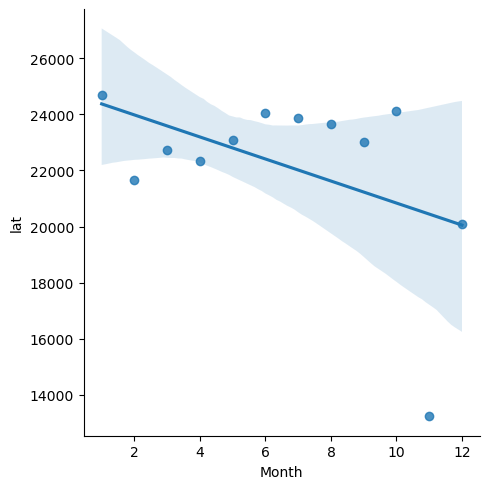

In [53]:
sns.lmplot(x='Month', y='lat', data=byMonth)

Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.

In [54]:
df['Date'] = df['timeStamp'].apply(lambda time:time.date())

In [55]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,16,12,Thu,2015-12-10


In [56]:
#Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

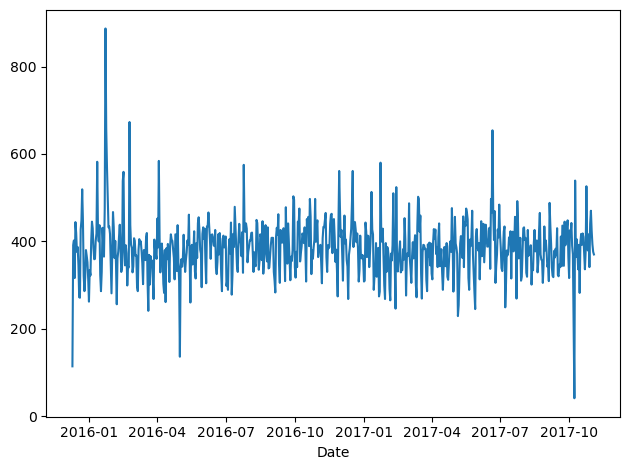

In [57]:
df.groupby(by='Date').count()['lat'].plot()
plt.tight_layout()

In [58]:
#Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

Text(0.5, 1.0, 'Traffic')

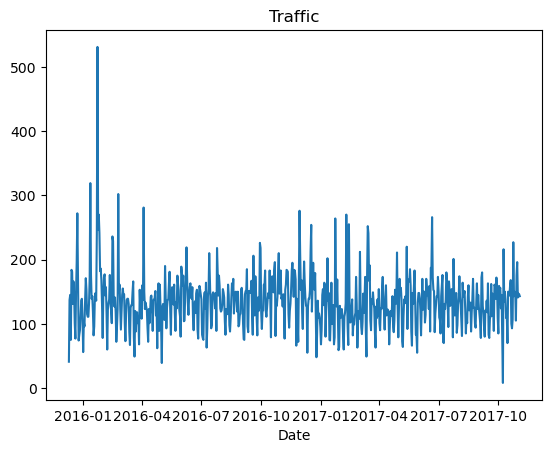

In [59]:
df[df['Reason']=='Traffic'].groupby(by='Date').count()['lat'].plot()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

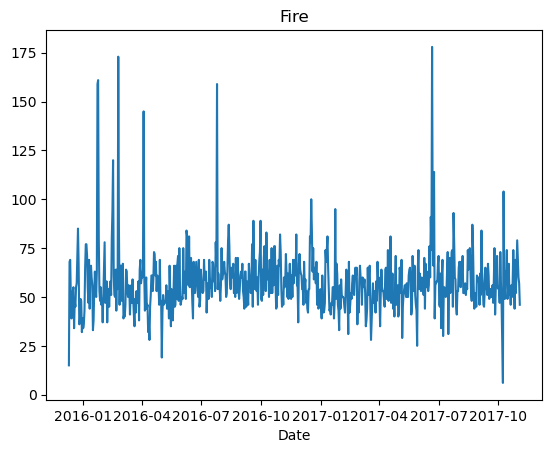

In [60]:
df[df['Reason']=='Fire'].groupby(by='Date').count()['lat'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

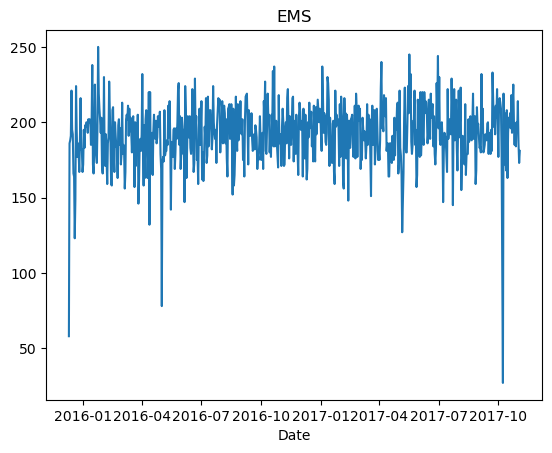

In [61]:
df[df['Reason']=='EMS'].groupby(by='Date').count()['lat'].plot()
plt.title('EMS')

Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an unstack method. Reference the solutions if you get stuck on this!

In [62]:
dfGrid = df.groupby(by=['Day of Week','Hour']).count()['lat'].unstack()
dfGrid = dfGrid.loc[['Sun','Mon','Tue','Wed','Thu','Fri','Sat']]
dfGrid

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Sun,952,835,815,665,578,618,730,939,1192,1519,...,1902,1780,1802,1853,1822,1700,1436,1267,986,904
Mon,746,572,542,493,546,711,1064,1806,2267,2320,...,2296,2508,2617,2617,2254,1814,1591,1257,1077,818
Tue,717,585,532,503,516,699,1122,1847,2321,2307,...,2422,2612,2781,2677,2347,1893,1649,1405,1101,843
Wed,684,606,516,516,452,668,1160,1915,2180,2224,...,2437,2529,2835,2870,2303,1887,1715,1419,1154,883
Thu,713,545,591,491,488,666,1126,1837,2131,2247,...,2410,2568,2571,2761,2274,1872,1631,1443,1153,927
Fri,716,643,577,522,493,631,1070,1722,2007,2111,...,2479,2688,2804,2721,2140,2041,1752,1497,1416,1109
Sat,914,804,718,651,597,626,767,1021,1302,1656,...,2134,2053,2065,2055,1982,1896,1640,1503,1324,1206


In [63]:
#Now create a HeatMap using this new DataFrame.

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

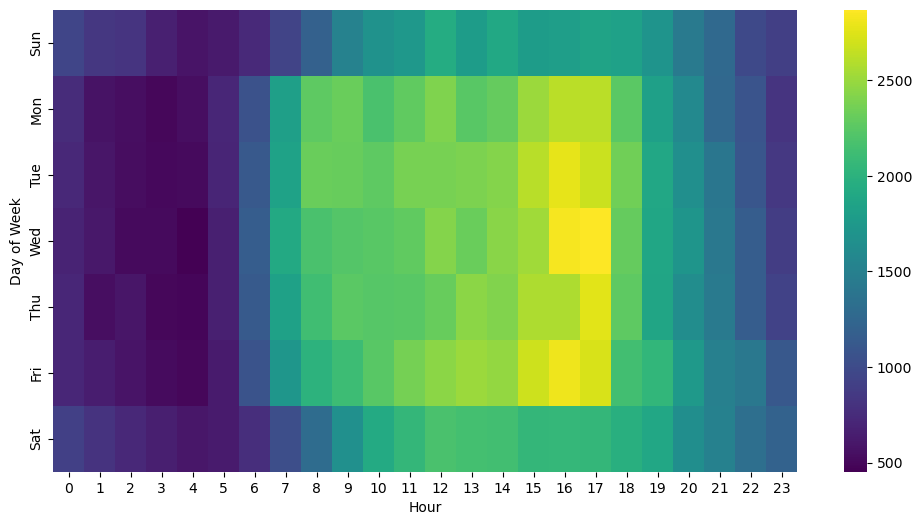

In [64]:
plt.figure(figsize=(12,6))
sns.heatmap(dfGrid, cmap='viridis')

In [65]:
#Now create a clustermap using this DataFrame.

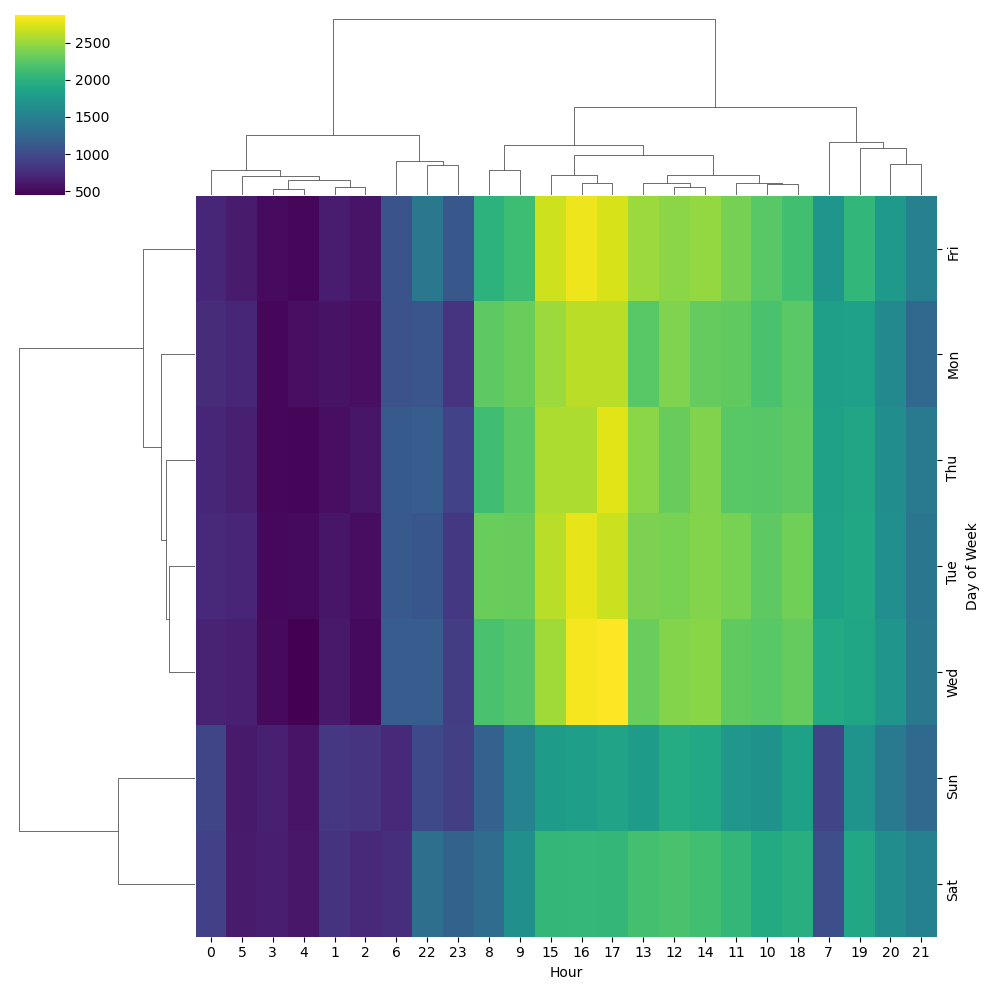

In [66]:
sns.clustermap(dfGrid, cmap='viridis')

In [67]:
#Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.

In [68]:
dfMonth = df.groupby(['Day of Week','Month']).count()['lat'].unstack()
dfMonth = dfMonth.loc[['Sun','Mon','Tue','Wed','Thu','Fri','Sat']]
dfMonth

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Sun,3470,2339,2229,3026,2580,2679,3259,2658,2565,3172,1281,2177
Mon,3706,3552,3103,3088,3538,3264,3687,3325,3031,4250,1682,2777
Tue,3953,3160,3529,3065,3991,3376,3213,4044,3142,3689,2193,2933
Wed,3336,3381,3902,3003,3653,3880,3198,4016,3191,3338,2483,2836
Thu,3182,3189,3909,3097,3289,4095,3248,3507,3702,3189,2006,3264
Fri,3527,3171,3532,3574,3278,3747,3736,3297,4226,3433,2069,3116
Sat,3527,2871,2539,3490,2764,3024,3515,2810,3144,3042,1516,2975


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

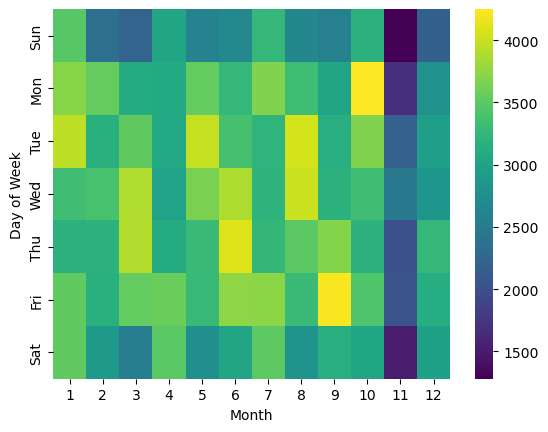

In [69]:
plt.figure(dpi=100)
sns.heatmap(dfMonth, cmap='viridis')

<Figure size 640x480 with 0 Axes>

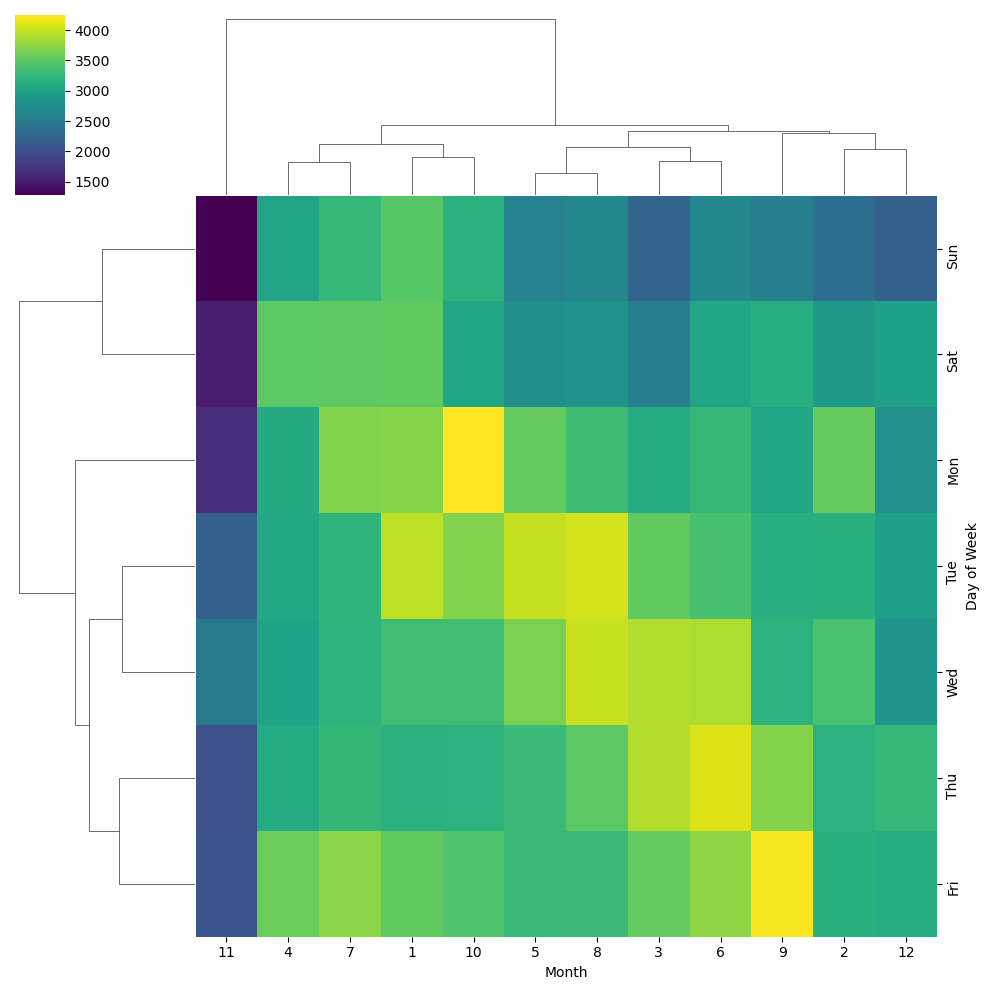

In [70]:
plt.figure(dpi=100)
sns.clustermap(dfMonth, cmap='viridis')

In [71]:
#Continue exploring the Data however you see fit!

In [73]:
#Great Job!